In [1]:
#% pip install openpyxl
import os, re, configparser
import pandas as pd
import numpy as np
from globals import glob
from utilities_database import prepare_data, prepare_database, consult_database, clear_databases, retrieve_data, rename_index, get_date, get_sigma, rename_limits_table
from utilities_analysis import mean_calculator, limits_generator, ini_generator_personalized, RyR, z_score_filter, reset_df
from utilities_plotting import plot_scatter, plot_capability
import _db_tools as db

Database *input.db* found in: c:\Users\luciano.galan\Desktop\Codebase\Python_Eiit_RyR\a2_RyR_Analyser\database\input.db
Database *output.db* found in: c:\Users\luciano.galan\Desktop\Codebase\Python_Eiit_RyR\a2_RyR_Analyser\database\output.db


In [2]:
#Data extraction
table_names = ['TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s', 'TOP_Passat_B9_limits_corrected_2023y_12m_13d_15h_47m_46s']
MEAS = retrieve_data("input.db", table_names[0])
LIMITS = retrieve_data("output.db", table_names[1])

Table *TOP_PASSAT_B9_measurements_2023y_12m_13d_14h_49m_51s* retrieved succesfully.
Table *TOP_Passat_B9_limits_corrected_2023y_12m_13d_15h_47m_46s* retrieved succesfully.


In [3]:
MEAS_format = rename_index(MEAS); LIMITS_format = rename_index(LIMITS)
df = pd.concat([MEAS, LIMITS], axis=1)
df.columns = [f"Test: {i}" for i in range(1, df.shape[1]-1)] + ["LSL", "USL"]
df_format = pd.concat([MEAS_format, LIMITS_format], axis=1)
df_format.columns = [f"Test: {i}" for i in range(1, df_format.shape[1]-1)] + ["LSL", "USL"]
df_format

,Test: 1,Test: 2,Test: 3,Test: 4,Test: 5,Test: 6,Test: 7,Test: 8,Test: 9,Test: 10,...,Test: 42,Test: 43,Test: 44,Test: 45,Test: 46,Test: 47,Test: 48,Test: 49,LSL,USL
Guia_Luz_Blanco_FB1_X,0.3248,0.3261,0.3248,0.3252,0.3253,0.3249,0.3257,0.3256,0.3256,0.3244,...,0.3258,0.3241,0.3246,0.3253,0.3231,0.3244,0.3241,0.3249,0.313880,0.338880
Guia_Luz_Blanco_FB1_Y,0.3480,0.3489,0.3480,0.3491,0.3482,0.3485,0.3485,0.3497,0.3486,0.3476,...,0.3497,0.3481,0.3492,0.3497,0.3462,0.3479,0.3487,0.3483,0.333140,0.366740
Guia_Luz_Blanco_FB2_X,0.3340,0.3332,0.3313,0.3316,0.3329,0.3312,0.3326,0.3314,0.3330,0.3329,...,0.3312,0.3319,0.3307,0.3305,0.3305,0.3325,0.3305,0.3325,0.318586,0.343586
Guia_Luz_Blanco_FB2_Y,0.3590,0.3586,0.3568,0.3573,0.3584,0.3570,0.3582,0.3573,0.3586,0.3585,...,0.3573,0.3579,0.3571,0.3568,0.3565,0.3583,0.3569,0.3584,0.341680,0.375280
Guia_Luz_Blanco_FB3_X,0.3347,0.3385,0.3375,0.3383,0.3384,0.3383,0.3385,0.3384,0.3388,0.3387,...,0.3381,0.3383,0.3380,0.3384,0.3393,0.3384,0.3384,0.3390,0.326705,0.351705
Guia_Luz_Blanco_FB3_Y,0.3556,0.3659,0.3651,0.3658,0.3658,0.3657,0.3659,0.3659,0.3661,0.3661,...,0.3656,0.3657,0.3655,0.3658,0.3663,0.3658,0.3658,0.3663,0.349441,0.383041
Guia_Luz_Blanco_FB4_X,0.3247,0.3247,0.3250,0.3251,0.3244,0.3252,0.3247,0.3243,0.3246,0.3239,...,0.3234,0.3236,0.3235,0.3237,0.3238,0.3238,0.3233,0.3233,0.313880,0.338880
Guia_Luz_Blanco_FB4_Y,0.3463,0.3472,0.3467,0.3468,0.3471,0.3469,0.3474,0.3472,0.3464,0.3469,...,0.3468,0.3458,0.3462,0.3471,0.3463,0.3464,0.3468,0.3468,0.333140,0.366740
Guia_Luz_Blanco_FB5_X,0.3344,0.3318,0.3335,0.3336,0.3312,0.3334,0.3312,0.3315,0.3335,0.3310,...,0.3309,0.3333,0.3330,0.3311,0.3327,0.3332,0.3306,0.3309,0.318586,0.343586
Guia_Luz_Blanco_FB5_Y,0.3601,0.3585,0.3599,0.3599,0.3582,0.3599,0.3582,0.3585,0.3599,0.3582,...,0.3583,0.3598,0.3597,0.3583,0.3595,0.3599,0.3582,0.3582,0.341680,0.375280


In [4]:
sigma = 6
#Calculate the means per nest.
    # means_df = rename_index(mean_calculator(MEAS) #Global means version
means_df = mean_calculator(MEAS, glob.lenses_per_nest)
means_df_format = rename_index(means_df)
resume = MEAS.transpose().describe().transpose() #Transpose the df first due to describe() working in columns.
analysis = pd.concat([means_df, resume.iloc[:, 2:3]], axis=1)
analysis_=analysis
specification_limits = df.iloc[:, -2:]
specification_limits = specification_limits.rename(columns={49: "LSL", 50: "USL"})
analysis = pd.concat([analysis, specification_limits], axis=1)
capabilities = []; capabilities_corrected = []; low_limits = []; high_limits = []
for index, row in analysis.iterrows():
    mean = row["mean"]
    std = row["std"]
    LSL = row["LSL"]
    USL = row["USL"]
    low_limit = mean - (1/2)*(sigma * std)
    high_limit = mean + (1/2)*(sigma * std)
    Cp = (USL - LSL)/(sigma * std)
    Cpl = ((mean - LSL)/(sigma * std))*(1/2)
    Cph = ((USL - mean)/(sigma * std))*(1/2)
    Cpk = min(Cpl, Cph)
    low_limits.append(round(low_limit, 4))
    high_limits.append(round(high_limit, 4))
    capabilities.append(Cp)
    capabilities_corrected.append(Cpk)
capabilities = pd.DataFrame(capabilities, columns=["Cp"])
capabilities_corrected = pd.DataFrame(capabilities_corrected, columns=["Cpk"])
low_limits = pd.DataFrame(low_limits, columns=["CAL_LO_LIMIT"])
high_limits = pd.DataFrame(high_limits, columns=["CAL_HI_LIMIT"])
analysis = pd.concat([analysis, low_limits, high_limits, capabilities, capabilities_corrected], axis=1)
analysis_format = rename_index(analysis)
analysis_format

,mean,std,LSL,USL,CAL_LO_LIMIT,CAL_HI_LIMIT,Cp,Cpk
Guia_Luz_Blanco_FB1_X,0.326380,0.000645,0.313880,0.338880,0.3244,0.3283,6.455104,1.613776
Guia_Luz_Blanco_FB1_Y,0.349940,0.000819,0.333140,0.366740,0.3475,0.3524,6.834077,1.708519
Guia_Luz_Blanco_FB2_X,0.331086,0.001032,0.318586,0.343586,0.3280,0.3342,4.038255,1.009564
Guia_Luz_Blanco_FB2_Y,0.358480,0.000739,0.341680,0.375280,0.3563,0.3607,7.580336,1.895084
Guia_Luz_Blanco_FB3_X,0.339205,0.000599,0.326705,0.351705,0.3374,0.3410,6.956532,1.739133
Guia_Luz_Blanco_FB3_Y,0.366241,0.001476,0.349441,0.383041,0.3618,0.3707,3.793176,0.948294
Guia_Luz_Blanco_FB4_X,0.326380,0.000560,0.313880,0.338880,0.3247,0.3281,7.434568,1.858642
Guia_Luz_Blanco_FB4_Y,0.349940,0.000577,0.333140,0.366740,0.3482,0.3517,9.712625,2.428156
Guia_Luz_Blanco_FB5_X,0.331086,0.001178,0.318586,0.343586,0.3276,0.3346,3.535678,0.883920
Guia_Luz_Blanco_FB5_Y,0.358480,0.000823,0.341680,0.375280,0.3560,0.3609,6.806592,1.701648


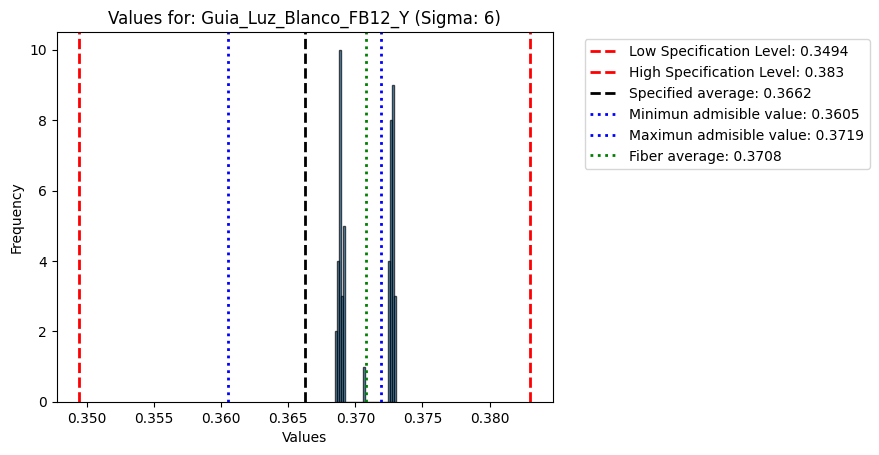

In [5]:
label = "Guia_Luz_Blanco_FB12_Y"
plot_capability(MEAS_format, analysis_format, label, sigma)

In [6]:
import pandas as pd

# Using ?? to display documentation/source code
??plot_capability

Signature: plot_capability(measurements, analysis_table, label, sigma)
Source:   
def plot_capability(measurements, analysis_table, label, sigma):
    ''''Plot a histogram with the values of a single fiber'''
    row = measurements.loc[label]
    mean = analysis_table.loc[label]["mean"]
    plt.hist(row.values, bins=30, edgecolor='black', alpha=0.7)
    try:
        low_limit = analysis_table.loc[label]['LO_LIMIT']
        high_limit = analysis_table.loc[label]['HI_LIMIT']
    except:
        low_limit = analysis_table.loc[label]['LSL']
        high_limit = analysis_table.loc[label]['USL']
    limits = [low_limit, high_limit]  # Replace with the positions where you want to draw lines
    for index, limit in enumerate(limits):
        legend_label = "Low Specification Level: " if index==0 else "High Specification Level: "
        plt.axvline(limit, color='red', linestyle='dashed', linewidth=2, label=f"{legend_label}{round(limit, 4)}")
    plt.axvline(mean, color='black', linestyle='dash